In [112]:
from bs4 import BeautifulSoup
import requests
import pandas as pd 
import numpy as np

In [113]:
website = 'https://www.cars.com/shopping/results/?stock_type=cpo&makes%5B%5D=&models%5B%5D=&list_price_max=&maximum_distance=20&zip='

In [114]:
response = requests.get(website)

In [115]:
response.status_code

200

In [116]:
soup = BeautifulSoup(response.content, 'html.parser')

In [117]:
results = soup.find_all('div', {'class' : 'vehicle-card'})

In [118]:
len(results)

21

In [119]:
results[0].find('h2').get_text()

'2021 Toyota Highlander XSE'

In [120]:
results[0].find('div', {'class':'mileage'}).get_text()

'35,588 mi.'

In [121]:
results[0].find('div', {'class':'dealer-name'}).get_text().strip()

'Shottenkirk Toyota of Weatherford'

In [122]:
results[0].find('span', {'class':'sds-rating__count'}).get_text()

'3.9'

In [123]:
results[0].find('span', {'class':'sds-rating__link'}).get_text()

'(1,728 reviews)'

In [124]:
results[0].find('span', {'class':'primary-price'}).get_text()

'$40,872'

In [125]:
name = []
mileage = []
dealer_name = []
rating = []
review_count = []
price = []

for result in results:
    
    # name
    try:
        name.append(result.find('h2').get_text()) 
    except:
        name.append('n/a')
    
    # mileage
    try:
        mileage.append(result.find('div', {'class':'mileage'}).get_text())
    except:
        mileage.append('n/a')
    
    # dealer_name
    try:
        dealer_name.append(result.find('div', {'class':'dealer-name'}).get_text().strip())
    except:
        dealer_name.append('n/a')
        
    # rating
    try:
        rating.append(result.find('span', {'class':'sds-rating__count'}).get_text())
    except:
        rating.append('n/a')
    
    # review_count
    try:
        review_count.append(result.find('span', {'class':'sds-rating__link'}).get_text())
    except:
        review_count.append('n/a')
    
    #price 
    try:
        price.append(result.find('span', {'class':'primary-price'}).get_text())
    except:
        price.append('n/a')

In [126]:
# dictionary
car_dealer = pd.DataFrame({'Name': name, 'Mileage':mileage, 'Dealer Name':dealer_name,
                                'Rating': rating, 'Review Count': review_count, 'Price': price})

In [127]:
car_dealer

,Name,Mileage,Dealer Name,Rating,Review Count,Price
0,2021 Toyota Highlander XSE,"35,588 mi.",Shottenkirk Toyota of Weatherford,3.9,"(1,728 reviews)","$40,872"
1,2019 Cadillac CT6 Luxury,"29,364 mi.",Brotherton Cadillac NW,n/a,(386 reviews),"$48,880"
2,2021 Dodge Durango R/T,"24,717 mi.",Woody's Dodge Jeep Chrysler RAM,4.6,"(1,821 reviews)","$54,413"
3,2020 GMC Acadia Denali,"29,486 mi.",Cavender Buick GMC North,4.3,(142 reviews),"$42,300"
4,2019 Kia Niro LX,"32,132 mi.",Matthews Kia of Schenectady,4.5,(601 reviews),"$23,178"
5,2020 Nissan Armada SV,"8,595 mi.",Future Nissan of Folsom,4.7,"(1,149 reviews)","$34,988"
6,2022 Kia Stinger GT-Line,"9,132 mi.",Airport Kia,3.7,(353 reviews),"$34,990"
7,2020 Maserati Levante S GranLusso,"31,241 mi.",Ferrari of Palm Beach,4.5,(40 reviews),"$68,995"
8,2021 Porsche 718 Cayman GT4,"6,986 mi.",Foreign Cars Italia,4.9,"(1,274 reviews)","$157,992"
9,2022 Toyota Corolla Hybrid LE,"5,768 mi.",Kalispell Toyota,4.5,(129 reviews),"$29,990"


In [128]:
name = []
mileage = []
dealer_name = []
rating = []
review_count = []
price = []

for i in range (1,500):
    
    # website in variable
    website = 'https://www.cars.com/shopping/results/?page='+ str(i) +'&page_size=20&list_price_max=&makes[]=&maximum_distance=20&models[]=&stock_type=cpo&zip=' 
    
    # request to website
    response = requests.get(website)
    
    # soup object
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # results
    results = soup.find_all('div', {'class' : 'vehicle-card'})
    
    # loop through results
    for result in results:
    
        # name
        try:
            name.append(result.find('h2').get_text()) 
        except:
            name.append('n/a')

        # mileage
        try:
            mileage.append(result.find('div', {'class':'mileage'}).get_text())
        except:
            mileage.append('n/a')

        # dealer_name
        try:
            dealer_name.append(result.find('div', {'class':'dealer-name'}).get_text().strip())
        except:
            dealer_name.append('n/a')
            
              # rating
        try:
            rating.append(result.find('span', {'class':'sds-rating__count'}).get_text())
        except:
            rating.append('n/a')

        # review_count
        try:
            review_count.append(result.find('span', {'class':'sds-rating__link'}).get_text())
        except:
            review_count.append('n/a')

        #price 
        try:
            price.append(result.find('span', {'class':'primary-price'}).get_text())
        except:
            price.append('n/a')

In [129]:
# dictionary
car_dealer = pd.DataFrame({'Name': name, 'Mileage':mileage, 'Dealer Name':dealer_name,
                                'Rating': rating, 'Review Count': review_count, 'Price': price})

In [130]:
car_dealer

,Name,Mileage,Dealer Name,Rating,Review Count,Price
0,2021 Toyota Highlander XSE,"35,588 mi.",Shottenkirk Toyota of Weatherford,3.9,"(1,728 reviews)","$40,872"
1,2020 GMC Acadia Denali,"29,486 mi.",Cavender Buick GMC North,4.3,(142 reviews),"$42,300"
2,2019 Cadillac CT6 Luxury,"29,364 mi.",Brotherton Cadillac NW,n/a,(386 reviews),"$48,880"
3,2021 Dodge Durango R/T,"24,717 mi.",Woody's Dodge Jeep Chrysler RAM,4.6,"(1,821 reviews)","$54,413"
4,2022 Kia Stinger GT-Line,"9,132 mi.",Airport Kia,3.7,(353 reviews),"$34,990"
...,...,...,...,...,...,...
10106,2019 BMW 330 i xDrive,"37,442 mi.",Sewell BMW MINI of Plano,4.6,"(1,068 reviews)","$34,999"
10107,2020 Toyota Tundra Platinum,"28,215 mi.",Kolar Imported,4.8,(454 reviews),"$53,490"
10108,2021 Ford Ranger XLT,"3,941 mi.",Jack Madden Ford,3.4,(624 reviews),"$41,296"
10109,2022 GMC Sierra 1500 Limited Elevation,"1,955 mi.",Moran Buick GMC,4.9,(41 reviews),"$45,000"


In [131]:
car_dealer['Review Count'] = car_dealer['Review Count'].apply(lambda x: x.strip('reviews)').strip('('))

In [132]:
car_dealer

,Name,Mileage,Dealer Name,Rating,Review Count,Price
0,2021 Toyota Highlander XSE,"35,588 mi.",Shottenkirk Toyota of Weatherford,3.9,"1,728","$40,872"
1,2020 GMC Acadia Denali,"29,486 mi.",Cavender Buick GMC North,4.3,142,"$42,300"
2,2019 Cadillac CT6 Luxury,"29,364 mi.",Brotherton Cadillac NW,n/a,386,"$48,880"
3,2021 Dodge Durango R/T,"24,717 mi.",Woody's Dodge Jeep Chrysler RAM,4.6,"1,821","$54,413"
4,2022 Kia Stinger GT-Line,"9,132 mi.",Airport Kia,3.7,353,"$34,990"
...,...,...,...,...,...,...
10106,2019 BMW 330 i xDrive,"37,442 mi.",Sewell BMW MINI of Plano,4.6,"1,068","$34,999"
10107,2020 Toyota Tundra Platinum,"28,215 mi.",Kolar Imported,4.8,454,"$53,490"
10108,2021 Ford Ranger XLT,"3,941 mi.",Jack Madden Ford,3.4,624,"$41,296"
10109,2022 GMC Sierra 1500 Limited Elevation,"1,955 mi.",Moran Buick GMC,4.9,41,"$45,000"


In [278]:
car_dealer.to_csv('cars_data.csv', index=False)

# DATA ANALYSIS

In [279]:
import pandas as pd

In [280]:
df = pd.read_csv('cars_data.csv')

In [281]:
df.head()

,Name,Mileage,Dealer Name,Rating,Review Count,Price
0,2021 Toyota Highlander XSE,"35,588 mi.",Shottenkirk Toyota of Weatherford,3.9,"1,728","$40,872"
1,2020 GMC Acadia Denali,"29,486 mi.",Cavender Buick GMC North,4.3,142,"$42,300"
2,2019 Cadillac CT6 Luxury,"29,364 mi.",Brotherton Cadillac NW,NaN,386,"$48,880"
3,2021 Dodge Durango R/T,"24,717 mi.",Woody's Dodge Jeep Chrysler RAM,4.6,"1,821","$54,413"
4,2022 Kia Stinger GT-Line,"9,132 mi.",Airport Kia,3.7,353,"$34,990"


In [282]:
df.columns

Index(['Name', 'Mileage', 'Dealer Name', 'Rating', 'Review Count', 'Price'], dtype='object')

In [283]:
df.dtypes

Name             object
Mileage          object
Dealer Name      object
Rating          float64
Review Count     object
Price            object
dtype: object

In [284]:
df['Make']= df['Name'].str.split(' ', expand=True).get(1,4)


In [285]:
df['Year'] = df['Name'].str.split(' ', expand=True).get(0)

In [286]:
df.head()

,Name,Mileage,Dealer Name,Rating,Review Count,Price,Make,Year
0,2021 Toyota Highlander XSE,"35,588 mi.",Shottenkirk Toyota of Weatherford,3.9,"1,728","$40,872",Toyota,2021
1,2020 GMC Acadia Denali,"29,486 mi.",Cavender Buick GMC North,4.3,142,"$42,300",GMC,2020
2,2019 Cadillac CT6 Luxury,"29,364 mi.",Brotherton Cadillac NW,NaN,386,"$48,880",Cadillac,2019
3,2021 Dodge Durango R/T,"24,717 mi.",Woody's Dodge Jeep Chrysler RAM,4.6,"1,821","$54,413",Dodge,2021
4,2022 Kia Stinger GT-Line,"9,132 mi.",Airport Kia,3.7,353,"$34,990",Kia,2022


In [275]:
df['Year'] = df['Name'].str.split(' ').str.get(0).rename({0: 'Year'})

In [276]:
# df['Year']

0         NaN
1        2020
2        2019
3        2021
4        2022
         ... 
10106    2019
10107    2020
10108    2021
10109    2022
10110    2020
Name: Year, Length: 10111, dtype: object

In [288]:
# df.Name.str.extract('(?P<Year>\d{1,4})')
df['Name'].str.partition(' ')[[0, 2]].rename({0: 'Year', 2: 'Make'})
# 


,0,2
Year,2021,Toyota Highlander XSE
1,2020,GMC Acadia Denali
Make,2019,Cadillac CT6 Luxury
3,2021,Dodge Durango R/T
4,2022,Kia Stinger GT-Line
...,...,...
10106,2019,BMW 330 i xDrive
10107,2020,Toyota Tundra Platinum
10108,2021,Ford Ranger XLT
10109,2022,GMC Sierra 1500 Limited Elevation


In [290]:
df.insert(0, "Make Year", df.Year, True)

In [291]:
df.insert(1, "Make Name", df.Make, True)

In [292]:
df

,Make Year,Make Name,Name,Mileage,Dealer Name,Rating,Review Count,Price,Make,Year
0,2021,Toyota,2021 Toyota Highlander XSE,"35,588 mi.",Shottenkirk Toyota of Weatherford,3.9,"1,728","$40,872",Toyota,2021
1,2020,GMC,2020 GMC Acadia Denali,"29,486 mi.",Cavender Buick GMC North,4.3,142,"$42,300",GMC,2020
2,2019,Cadillac,2019 Cadillac CT6 Luxury,"29,364 mi.",Brotherton Cadillac NW,NaN,386,"$48,880",Cadillac,2019
3,2021,Dodge,2021 Dodge Durango R/T,"24,717 mi.",Woody's Dodge Jeep Chrysler RAM,4.6,"1,821","$54,413",Dodge,2021
4,2022,Kia,2022 Kia Stinger GT-Line,"9,132 mi.",Airport Kia,3.7,353,"$34,990",Kia,2022
...,...,...,...,...,...,...,...,...,...,...
10106,2019,BMW,2019 BMW 330 i xDrive,"37,442 mi.",Sewell BMW MINI of Plano,4.6,"1,068","$34,999",BMW,2019
10107,2020,Toyota,2020 Toyota Tundra Platinum,"28,215 mi.",Kolar Imported,4.8,454,"$53,490",Toyota,2020
10108,2021,Ford,2021 Ford Ranger XLT,"3,941 mi.",Jack Madden Ford,3.4,624,"$41,296",Ford,2021
10109,2022,GMC,2022 GMC Sierra 1500 Limited Elevation,"1,955 mi.",Moran Buick GMC,4.9,41,"$45,000",GMC,2022


In [293]:
df = df.drop(columns=['Name', 'Make', 'Year'])

In [294]:
df

,Make Year,Make Name,Mileage,Dealer Name,Rating,Review Count,Price
0,2021,Toyota,"35,588 mi.",Shottenkirk Toyota of Weatherford,3.9,"1,728","$40,872"
1,2020,GMC,"29,486 mi.",Cavender Buick GMC North,4.3,142,"$42,300"
2,2019,Cadillac,"29,364 mi.",Brotherton Cadillac NW,NaN,386,"$48,880"
3,2021,Dodge,"24,717 mi.",Woody's Dodge Jeep Chrysler RAM,4.6,"1,821","$54,413"
4,2022,Kia,"9,132 mi.",Airport Kia,3.7,353,"$34,990"
...,...,...,...,...,...,...,...
10106,2019,BMW,"37,442 mi.",Sewell BMW MINI of Plano,4.6,"1,068","$34,999"
10107,2020,Toyota,"28,215 mi.",Kolar Imported,4.8,454,"$53,490"
10108,2021,Ford,"3,941 mi.",Jack Madden Ford,3.4,624,"$41,296"
10109,2022,GMC,"1,955 mi.",Moran Buick GMC,4.9,41,"$45,000"


In [296]:
df['Mileage']=df['Mileage'].str.replace('mi.','')
df['Mileage']=df['Mileage'].str.strip()
df['Mileage']=df['Mileage'].str.replace(',','')

In [388]:
# df['Mileage']=df['Mileage'].replace(',','')
# # df['Mileage']=df['Mileage'].strip()

In [297]:
df['Mileage']

0        35588
1        29486
2        29364
3        24717
4         9132
         ...  
10106    37442
10107    28215
10108     3941
10109     1955
10110    44498
Name: Mileage, Length: 10111, dtype: object

In [298]:
len(df)

10111

In [299]:
df['Price']=df['Price'].str.replace('$','')
df['Price']=df['Price'].str.strip()

In [301]:
df['Price']=df['Price'].str.replace(',','')
# df['Price']=df['Price'].astype('int')

In [302]:
df['Price']

0        40872
1        42300
2        48880
3        54413
4        34990
         ...  
10106    34999
10107    53490
10108    41296
10109    45000
10110    38996
Name: Price, Length: 10111, dtype: object

In [303]:
df.isnull().sum().sum()

1007

In [304]:
df.columns[df.isna().any()]

Index(['Mileage', 'Rating', 'Review Count'], dtype='object')

In [305]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context= 'notebook', ticks= True, grid= False)
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import warnings
warnings.filterwarnings('ignore')


In [306]:
df.columns

Index(['Make Year', 'Make Name', 'Mileage', 'Dealer Name', 'Rating',
       'Review Count', 'Price'],
      dtype='object')

In [307]:
df['Make Name'].unique()

array(['Toyota', 'GMC', 'Cadillac', 'Dodge', 'Kia', 'Nissan', 'Porsche',
       'Maserati', 'Jeep', 'INFINITI', 'BMW', 'Chevrolet', 'Subaru',
       'Chrysler', 'Volkswagen', 'Buick', 'Honda', 'Ford', 'Volvo', 'RAM',
       'MINI', 'Acura', 'Ferrari', 'Rolls-Royce', 'Bentley', 'Alfa',
       'Aston', 'Mitsubishi', 'FIAT', 'Mercedes-Benz'], dtype=object)

In [234]:
fig = px.histogram(df, x = "Make Name", labels= {"Make Name": "Name of the Manufacturer"}, title= "Manufacturer of the car", color_discrete_sequence= ["blue"])

fig.show()

In [235]:
fig = px.histogram(df, x = "Dealer Name", labels= {"Dealer": "Name of the Dearler"}, title= "Name Dealer", color_discrete_sequence= ["blue"])

fig.show()

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10111 entries, 0 to 10110
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make Year     10110 non-null  object 
 1   Make Name     10111 non-null  object 
 2   Mileage       10107 non-null  object 
 3   Dealer Name   10111 non-null  object 
 4   Rating        9168 non-null   float64
 5   Review Count  10051 non-null  object 
 6   Price         10111 non-null  object 
dtypes: float64(1), object(6)
memory usage: 553.1+ KB


In [237]:
fig = px.histogram(df, x = "Make Year", labels= {"Make Year": "Year of Manufacture"}, title= "Manufactured Year", color_discrete_sequence= ["blue"])

fig.show()

In [165]:
df['Rating'].isna().any()

True

In [166]:
df['Rating'].isnull().sum()

943

In [167]:
df.shape

(10111, 7)

In [168]:
df.describe()

,Rating
count,9168.000000
mean,4.337936
std,0.662575
min,1.200000
25%,4.100000
50%,4.600000
75%,4.800000
max,5.000000


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10111 entries, 0 to 10110
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make Year     10110 non-null  object 
 1   Make Name     10111 non-null  object 
 2   Mileage       10107 non-null  object 
 3   Dealer Name   10111 non-null  object 
 4   Rating        9168 non-null   float64
 5   Review Count  10051 non-null  object 
 6   Price         10111 non-null  object 
dtypes: float64(1), object(6)
memory usage: 553.1+ KB


In [238]:
df['Mileage'] = pd.to_numeric(df['Mileage'],errors='coerce')

In [416]:
# df['Review Count'] = pd.to_numeric(df['Review Count'],errors='coerce')

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10111 entries, 0 to 10110
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make Year     10110 non-null  object 
 1   Make Name     10111 non-null  object 
 2   Mileage       10107 non-null  float64
 3   Dealer Name   10111 non-null  object 
 4   Rating        9168 non-null   float64
 5   Review Count  10051 non-null  object 
 6   Price         10111 non-null  object 
dtypes: float64(2), object(5)
memory usage: 553.1+ KB


In [172]:
df['Price'].str.strip()

0        40872
1        42300
2        48880
3        54413
4        34990
         ...  
10106    34999
10107    53490
10108    41296
10109    45000
10110    38996
Name: Price, Length: 10111, dtype: object

In [308]:
df['Price'] = df['Price'].convert_dtypes(int)

In [309]:
df['Price'].isna().sum()

0

In [311]:
df.dtypes

Make Year        object
Make Name        object
Mileage          object
Dealer Name      object
Rating          float64
Review Count     object
Price            string
dtype: object

In [312]:
df['Price'] = df['Price'].replace({',':''}, regex=True)

In [313]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [314]:
df['Price'].isna().sum()

11

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10111 entries, 0 to 10110
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make Year     10111 non-null  object 
 1   Make Name     10111 non-null  object 
 2   Mileage       10107 non-null  object 
 3   Dealer Name   10111 non-null  object 
 4   Rating        9168 non-null   float64
 5   Review Count  10051 non-null  object 
 6   Price         10100 non-null  float64
dtypes: float64(2), object(5)
memory usage: 553.1+ KB


In [316]:
df.corr()

,Rating,Price
Rating,1.000000,0.035737
Price,0.035737,1.000000


<AxesSubplot:>

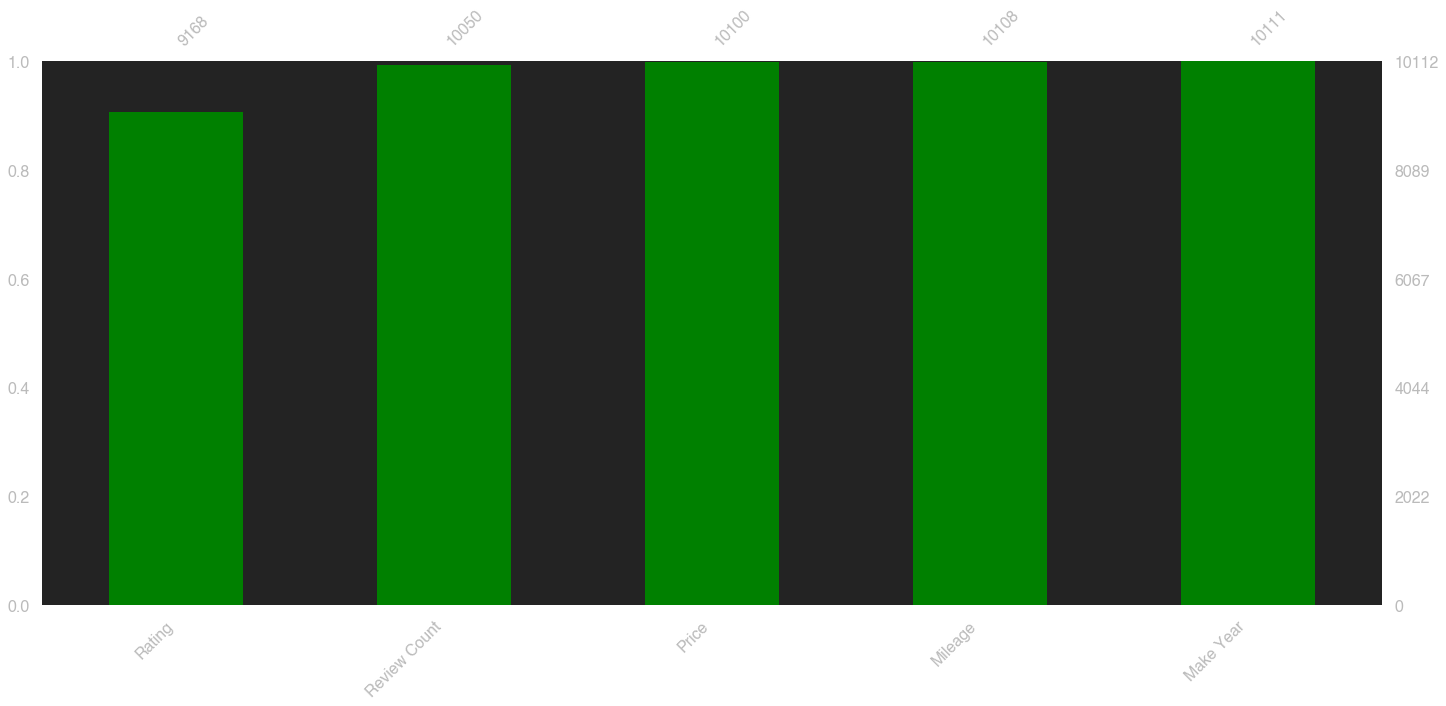

In [70]:
import missingno as mno
mno.bar(df[df.columns[df.isna().any()]], sort = 'ascending', color = 'green')

<Figure size 1080x576 with 0 Axes>

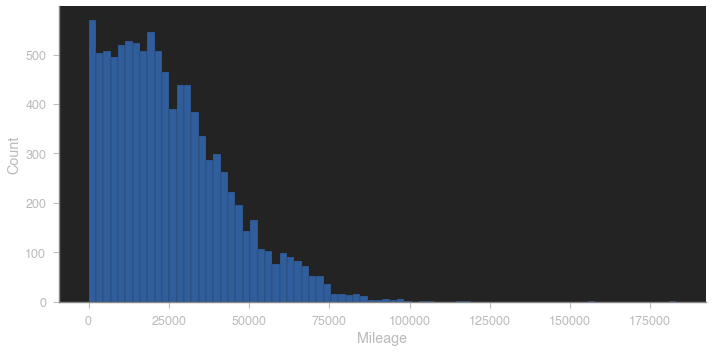

In [71]:
plt.figure(figsize=[15,8])
sns.displot(df['Mileage'], aspect=2)
plt.show()
# fig, ax =plt.subplots(figsize = (10,8))

<Figure size 1080x576 with 0 Axes>

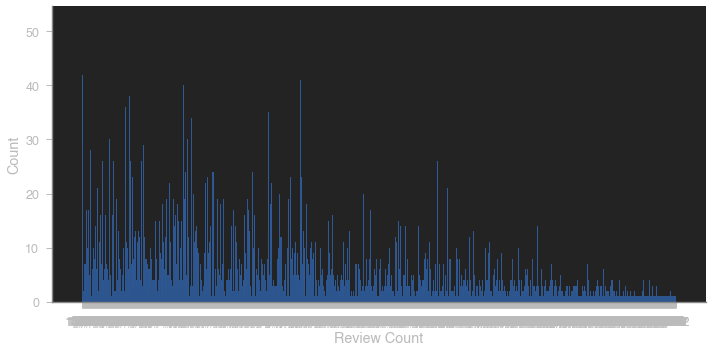

In [72]:
plt.figure(figsize=[15,8])
sns.displot(df['Review Count'], aspect=2)
plt.show()

<Figure size 1080x576 with 0 Axes>

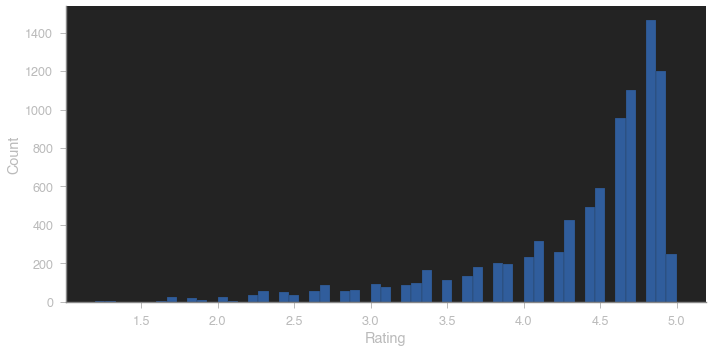

In [73]:
plt.figure(figsize=[15,8])
sns.displot(df['Rating'], aspect=2)
plt.show()

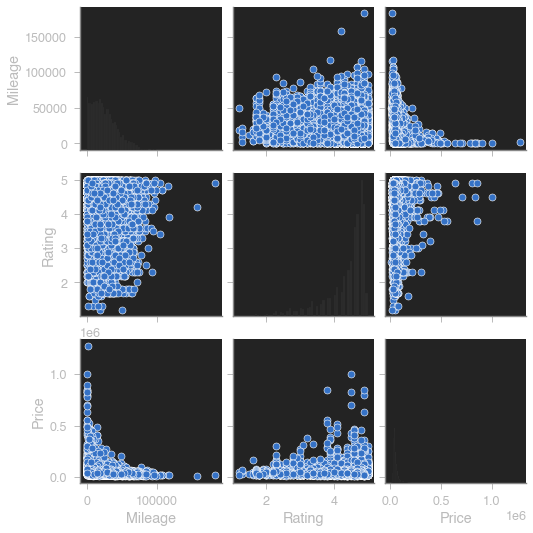

In [74]:
sns.pairplot(df)

<AxesSubplot:>

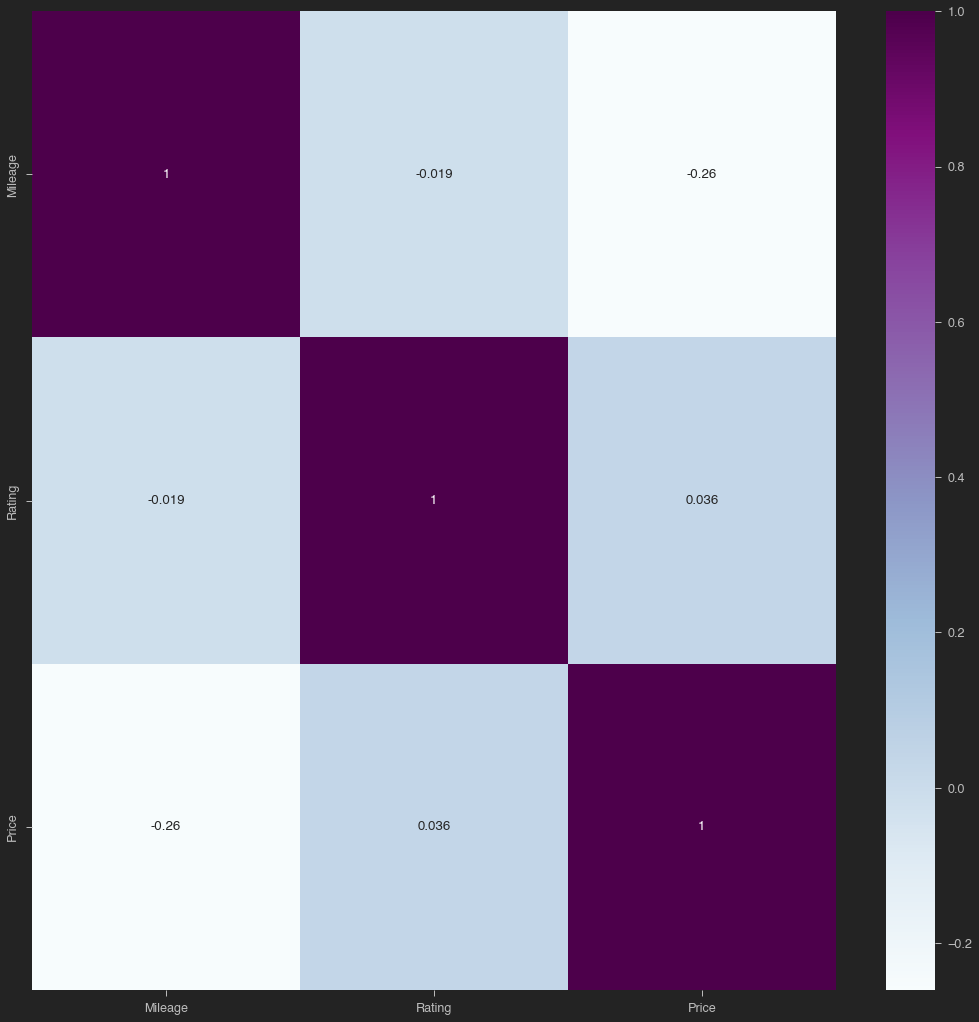

In [180]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), cmap="BuPu", annot=True)

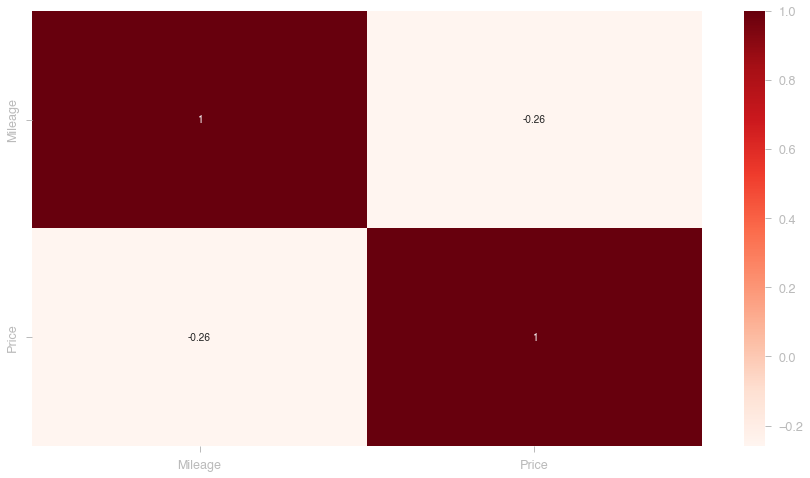

In [108]:
# Using Pearson's correalation
plt.figure(figsize = (15,8))
cor = df.corr()
cmap = plt.cm.Reds
sns.heatmap(cor, annot = True, cmap = cmap)
plt.show()

In [181]:
df.dtypes

Make Year        object
Make Name        object
Mileage         float64
Dealer Name      object
Rating          float64
Review Count     object
Price           float64
dtype: object

In [182]:
df.columns

Index(['Make Year', 'Make Name', 'Mileage', 'Dealer Name', 'Rating',
       'Review Count', 'Price'],
      dtype='object')

In [183]:
df.isna().sum()

Make Year         1
Make Name         0
Mileage           4
Dealer Name       0
Rating          943
Review Count     60
Price            11
dtype: int64

In [184]:
df['Rating'].isna().sum()

943

In [81]:
# Getting total number of NULL values and percentage of the columns
# null_columns = df.columns[df.isna().any()]
# null_value_count = df[df.columns[df.isna().any()]].isna().sum().sort_values(ascending=False)
# null_percentage = (df[df.columns[df.isna().any()]].isna().sum() * 100 / df.shape[0]).sort_values(ascending=False)
# null_data = pd.concat([null_value_count, null_percentage], axis=1, keys=['Count', 'Percentage'])
# null_data

,Count,Percentage
Rating,944,9.335443
Review Count,62,0.613133
Price,12,0.118671
Mileage,4,0.039557
Make Year,1,0.009889


In [318]:
df = df.drop(columns=['Rating'])

Dropping above columns as missing value count is more than 10%

In [319]:
df = df.fillna(0)

In [320]:
df.head()

,Make Year,Make Name,Mileage,Dealer Name,Review Count,Price
0,2021,Toyota,35588,Shottenkirk Toyota of Weatherford,"1,728",40872.0
1,2020,GMC,29486,Cavender Buick GMC North,142,42300.0
2,2019,Cadillac,29364,Brotherton Cadillac NW,386,48880.0
3,2021,Dodge,24717,Woody's Dodge Jeep Chrysler RAM,"1,821",54413.0
4,2022,Kia,9132,Airport Kia,353,34990.0


In [321]:
df.dtypes

Make Year        object
Make Name        object
Mileage          object
Dealer Name      object
Review Count     object
Price           float64
dtype: object

In [322]:
df_new = pd.get_dummies(df, columns=['Make Year', 'Make Name', 'Dealer Name', 'Review Count'])

In [323]:
df_new.head()

,Mileage,Price,Make Year_2007,Make Year_2008,Make Year_2010,Make Year_2011,Make Year_2012,Make Year_2013,Make Year_2014,Make Year_2015,...,Review Count_980,Review Count_981,Review Count_984,Review Count_989,Review Count_99,Review Count_991,Review Count_992,Review Count_994,Review Count_996,Review Count_999
0,35588,40872.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,29486,42300.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,29364,48880.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,24717,54413.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9132,34990.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [324]:
df_new.shape

(10111, 4774)

In [325]:
df_new.dtypes

Mileage               object
Price                float64
Make Year_2007         uint8
Make Year_2008         uint8
Make Year_2010         uint8
                      ...   
Review Count_991       uint8
Review Count_992       uint8
Review Count_994       uint8
Review Count_996       uint8
Review Count_999       uint8
Length: 4774, dtype: object

In [326]:
df_new = df_new.astype(int)

In [ ]:
# df['col'] = df['col'].astype(str).apply(lambda x: x.replace('.0',''))

In [335]:
df_new.round()

,Mileage,Price,Make Year_2007,Make Year_2008,Make Year_2010,Make Year_2011,Make Year_2012,Make Year_2013,Make Year_2014,Make Year_2015,...,Review Count_980,Review Count_981,Review Count_984,Review Count_989,Review Count_99,Review Count_991,Review Count_992,Review Count_994,Review Count_996,Review Count_999
0,35588,40872,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,29486,42300,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,29364,48880,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,24717,54413,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9132,34990,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10106,37442,34999,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10107,28215,53490,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10108,3941,41296,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10109,1955,45000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [336]:
X = df_new.drop('Price', axis = 1)
y = df_new['Price']

In [337]:
X

,Mileage,Make Year_2007,Make Year_2008,Make Year_2010,Make Year_2011,Make Year_2012,Make Year_2013,Make Year_2014,Make Year_2015,Make Year_2016,...,Review Count_980,Review Count_981,Review Count_984,Review Count_989,Review Count_99,Review Count_991,Review Count_992,Review Count_994,Review Count_996,Review Count_999
0,35588,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,29486,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,29364,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,24717,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9132,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10106,37442,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10107,28215,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10108,3941,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10109,1955,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [338]:
y

0        40872
1        42300
2        48880
3        54413
4        34990
         ...  
10106    34999
10107    53490
10108    41296
10109    45000
10110    38996
Name: Price, Length: 10111, dtype: int64

In [339]:
X = np.array(X)
y = np.array(y)

In [340]:
from sklearn.model_selection import train_test_split

In [341]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= .2, random_state=2)

# Linear Regression

In [342]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_model.score(X_test, y_test)


-5785846294.840537

In [334]:
# Calculation of R2 Score
# from sklearn.model_selection import cross_val_score
# print(cross_val_score(linear_model, X, y, cv=10, scoring="r2").mean())

# Tree Model

In [343]:
from sklearn.tree import DecisionTreeRegressor
dec_model = DecisionTreeRegressor()
dec_model.fit(X_train, y_train)
dec_model.score(X_test, y_test)

0.6053313199170968

# Random Regressor

In [344]:
from sklearn.ensemble import RandomForestRegressor
Random_model = RandomForestRegressor()
Random_model.fit(X_train, y_train)
Random_model.score(X_test, y_test)

0.6983409651990704

# XGB Regressor Model

In [345]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_model.score(X_test, y_test)

0.6548291276666305

# Ridge Model

In [346]:
from sklearn.linear_model import  Ridge
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
ridge_model.score(X_test, y_test)

0.606412853760486

# Lasso Model

In [347]:
from sklearn.linear_model import  Lasso
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
lasso_model.score(X_test, y_test)

0.5865297431393904